Giacomo Carfì - 520951

Assignment request:

Fit an Hidden Markov Model with Gaussian emissions to the data in DSET1: it is sufficient to focus on the “Appliances” and “Lights” columns of the dataset which measure the energy consumption of appliances and lights, respectively, across a period of 4.5 months. Consider the two columnsin isolation, i.e. train two separate HMM, one for appliances and one for light.  Experiment with HMMs with a varying number of hidden states (e.g. at least 2, 3 and 4). Once trained the HMMs, perform Viterbi on a reasonably sized subsequence (e.g. 1 month of data) and plot the timeseries data highlighting (e.g. with different colours) the hidden state assigned to each timepoint by the Viterbi algorithm.  Then, try sampling a sequence of at least 100 points from the trained HMMs and show it on a plot discussing similarities and differences w.r.t. the ground truth data.

In [54]:
#Library for using Hidden Markov Models and github repository where to find the dataset and other libraries used in the assignment.
!pip install hmmlearn
!git clone https://github.com/Sopralapanca/ISPRMidterm2Ass1.git

fatal: destination path 'ISPRMidterm2Ass1' already exists and is not an empty directory.


## LOAD THE DATASET AND PRINT SOME INFORMATION

In [55]:
import pandas as pd
import numpy as np

dataset_path = '/content/ISPRMidterm2Ass1/energydata_complete.csv'

df = pd.read_csv(dataset_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

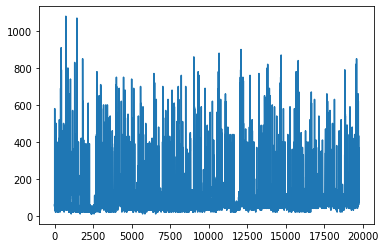

In [56]:
df_appliances = df['Appliances']
df_appliances.plot()

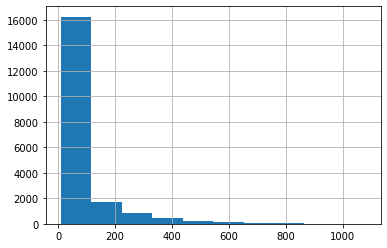

In [57]:
df_appliances.hist()

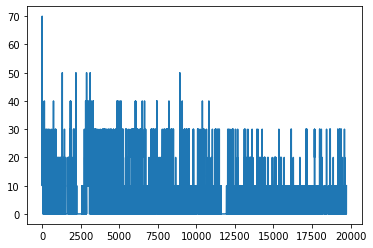

In [58]:
df_lights = df['lights']
df_lights.plot()

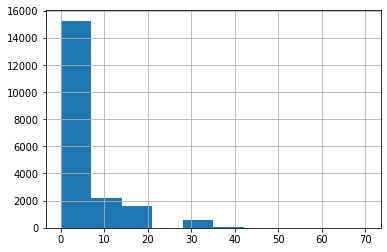

In [59]:
df_lights.hist()

In [60]:
import datetime
"""
Reads the data from energydata_complete.csv considering a specific column
"""
def load_data(column="Appliances"):
    df = pd.read_csv(dataset_path)
    df = df[["date", column]]
    df.index = pd.to_datetime(df["date"])
    df = df.set_index('date')
    
    return df

In [61]:
appliances_dataset = load_data(column="Appliances")
lights_dataset = load_data(column="lights")

## FIT HIDDEN MARKOV MODELS WITH GAUSSIAN EMISSION

In [62]:
def fit_model(n_comp, dataset, model_name):
  model = GaussianHMM(n_components=n_comp, covariance_type="diag", n_iter=1000, algorithm="viterbi")
  model.fit(dataset)
  print(f"{model_name} hidden states {n_comp} model converged: {model.monitor_.converged}")
  return model

Models trained using 2 to 4 hidden states are saved in two lists, for appliances dataset and lights dataset

In [63]:
from hmmlearn.hmm import GaussianHMM 
import matplotlib.pyplot as plt

#lists of fitted models usign different hidden states
a_models = []
l_models = []

#number of hidden states [2,3,4]
for i in range(2,5):
  appliances_model = fit_model(i, appliances_dataset, "Appliances")
  a_models.append(appliances_model)

  lights_model = fit_model(i, lights_dataset, "lights")
  l_models.append(lights_model)

  

Appliances hidden states 2 model converged: True
lights hidden states 2 model converged: True
Appliances hidden states 3 model converged: True
lights hidden states 3 model converged: True
Appliances hidden states 4 model converged: True
lights hidden states 4 model converged: True


## USE VITERBI ALGORITHM ON A SUBSEQUENCE OF DATA TO FIND THE OPTIMAL STATE ASSIGNMENT

In [64]:
# Consider data from the entire month of February to create a sub-sequence
def compute_subsequence(dataset):
  subseq = dataset['2016-02':'2016-03']
  subseq.index = pd.to_datetime(subseq.index)

  return subseq


In [65]:
# create subsequence from the dataset
a_subseq = compute_subsequence(appliances_dataset)
l_subseq = compute_subsequence(lights_dataset)

a_hidden_states_list=[]
l_hidden_states_list=[]

# save the sequence of hidden states for each model in a list for each dataset
for a_model, l_model in zip(a_models, l_models):

  #Decode the optimal sequence of internal state 
  a_hidden_states = a_model.predict(a_subseq)
  l_hidden_states = l_model.predict(l_subseq)

  a_hidden_states_list.append(a_hidden_states)
  l_hidden_states_list.append(l_hidden_states)

Plot of timeseries data by coloring the points differently according to the hidden states assigned to each point

In [66]:
def plot_hidden_states(hidden_states_list, subseq, column='Appliances'):
  fig, ax = plt.subplots(nrows=1, ncols=len(hidden_states_list), figsize=(25,5))
  fig.suptitle(f"{column} dataset")

  for col, hidden_states in enumerate(hidden_states_list):
    ax[col].set_title(f"Hidden States: {col+2}")

    for i in range(len(hidden_states)):
      
      if hidden_states[i] == 0:
          ax[col].scatter(subseq.index[i], subseq[column][i], c='g', s=5)
          
      if hidden_states[i] == 1:
          ax[col].scatter(subseq.index[i], subseq[column][i], c='r', s=5)
      
      if hidden_states[i] == 2:
          ax[col].scatter(subseq.index[i], subseq[column][i], c='y', s=5)
      
      if hidden_states[i] == 3:
          ax[col].scatter(subseq.index[i], subseq[column][i], c='b', s=5)

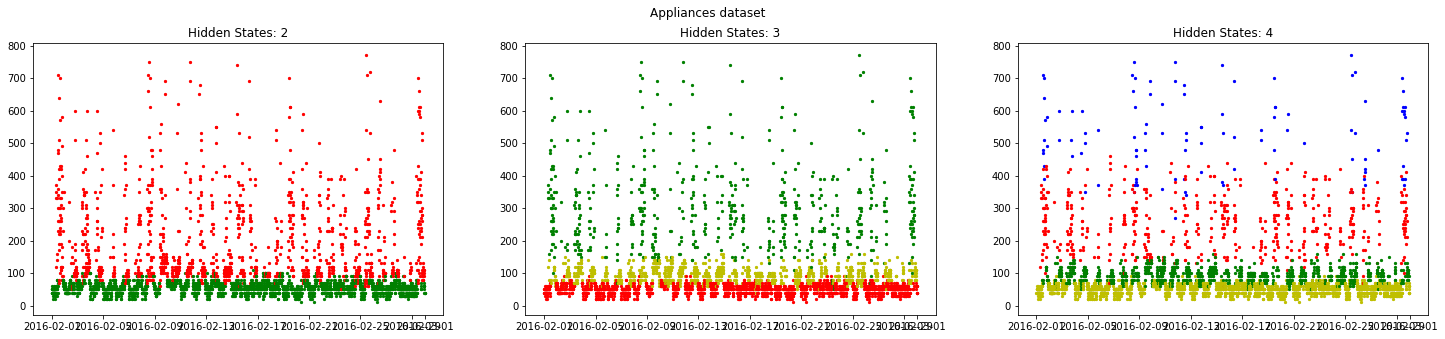

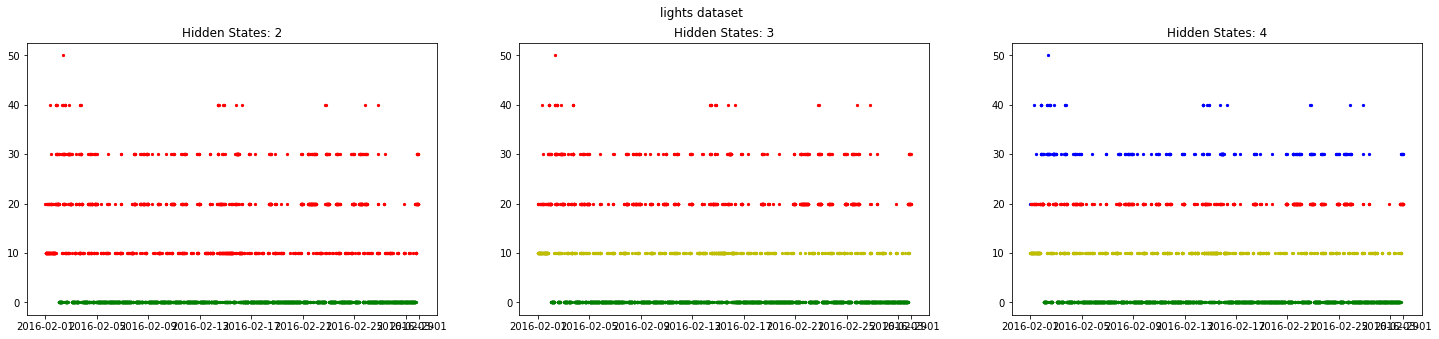

In [67]:
plot_hidden_states(hidden_states_list=a_hidden_states_list, subseq=a_subseq, column="Appliances")
plot_hidden_states(hidden_states_list=l_hidden_states_list, subseq=l_subseq, column="lights")

Plot of the transition matrix of the various models

In [68]:
"""
Using the library present at the link 
https://naysan.ca/2020/07/08/drawing-state-transition-diagrams-in-python/
to plot the state transition matrix of the models.
The necessary files are present in the github repository cloned at the beginning of the notebook.
"""
import sys
sys.path.insert(0,'/content/ISPRMidterm2Ass1')
from markovchain import MarkovChain

In [69]:
def plot_transition_matrix(model, column):
  P = model.transmat_
  print(f'\n\nParameters of {column} model.\n- Transition matrix: \n', P)
  

In [70]:
def plot_transition_matrix(model_list, dataset):
  for model in model_list:
    P = np.around(model.transmat_, decimals=3)
    
    states_number = len(P)
    states = []
    for i in range(states_number):
      states.append(str(i+1))
    
    mc = MarkovChain(P, states)
    mc.draw()

**Appliances**

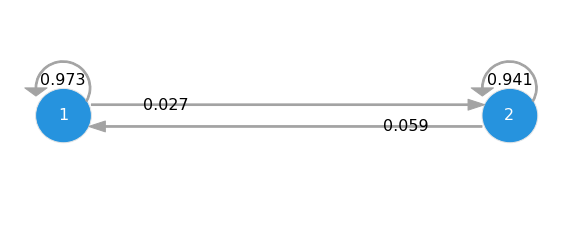

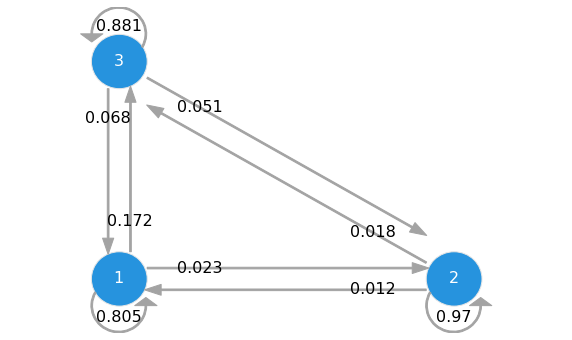

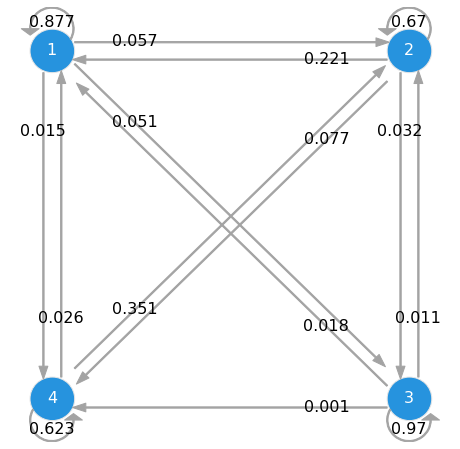

In [71]:
plot_transition_matrix(a_models, appliances_dataset)

**Lights**

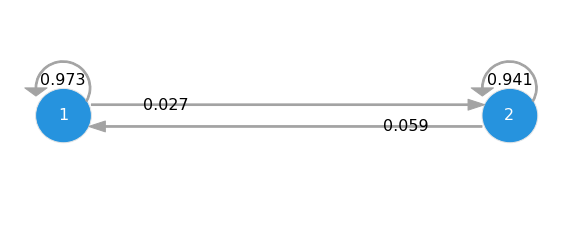

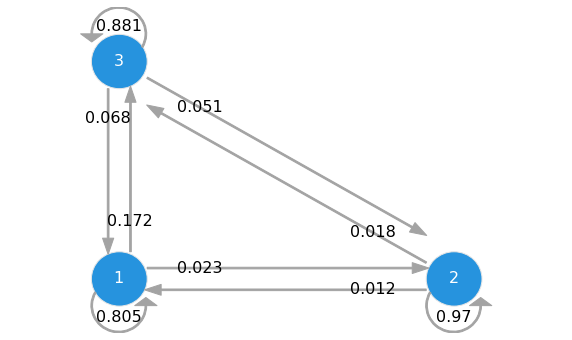

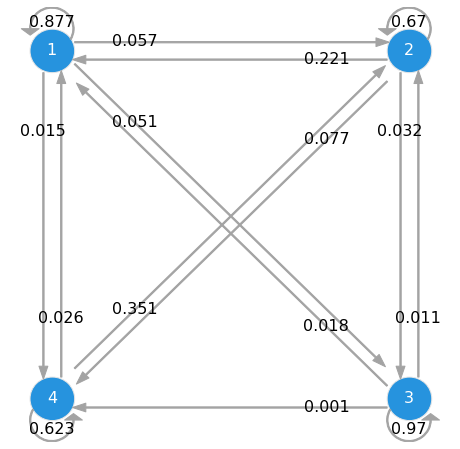

In [72]:
plot_transition_matrix(a_models, lights_dataset)

Computing the log likelihood it is possible to notice that as the number of hidden states used increases the log likelihood is higher

In [73]:
def compute_likelihood(model_list, dataset, column):
  for states, model in enumerate(model_list):
    logProb = model.score(dataset)
    print(f'Log likelihood for {column} dataset using {states+2} hidden states: \n', round(logProb,2))
    


In [74]:
compute_likelihood(a_models, appliances_dataset, "Appliances")


Log likelihood for Appliances dataset using 2 hidden states: 
 -97986.85
Log likelihood for Appliances dataset using 3 hidden states: 
 -91386.03
Log likelihood for Appliances dataset using 4 hidden states: 
 -90890.64


In [75]:
compute_likelihood(l_models, lights_dataset, "lights")

Log likelihood for lights dataset using 2 hidden states: 
 72094.83
Log likelihood for lights dataset using 3 hidden states: 
 90675.17
Log likelihood for lights dataset using 4 hidden states: 
 102940.9


## SAMPLING

In [83]:
# Generate new samples (visible, hidden), 
# plot it and returns a dataframe containing the data generated for each model
def compute_sampling(model_list, column):
  # generate 144 samples as this is the number of measurements taken over the course of a day
  n_samples=144 
  sample_df = pd.DataFrame()
  
  fig, ax = plt.subplots(nrows=1, ncols=len(model_list), figsize=(25,5))
  fig.suptitle(f"Samples generated for {column} dataset")

  for col, model in enumerate(model_list):
    ax[col].set_title(f"{col+2} Hidden States")
    
    #feature matrix - state sequence
    X, Z = model.sample(n_samples=n_samples)
    X = np.squeeze(X)
    sample_df[f'{column}_generated_{col+2}hs'] = X

    ax[col].plot(X, label="Generated Samples")

    if column == "Appliances":
      #highlight the sequence of hidden states for appliances
      ax[col].plot(Z*10, label="Hidden States")
    else:
      ax[col].plot(Z, label="Hidden States")
  
    ax[col].set_xlabel('Samples')
    ax[col].legend()
    
  return sample_df

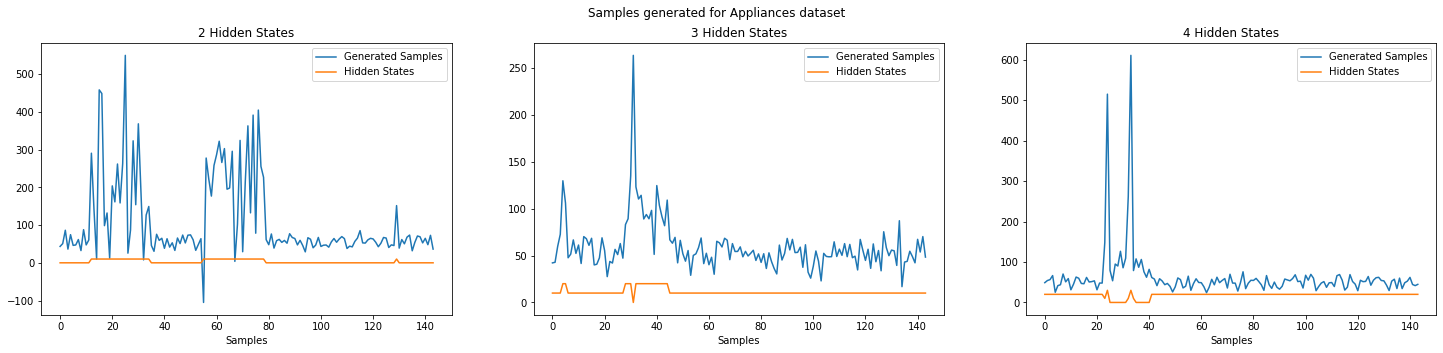

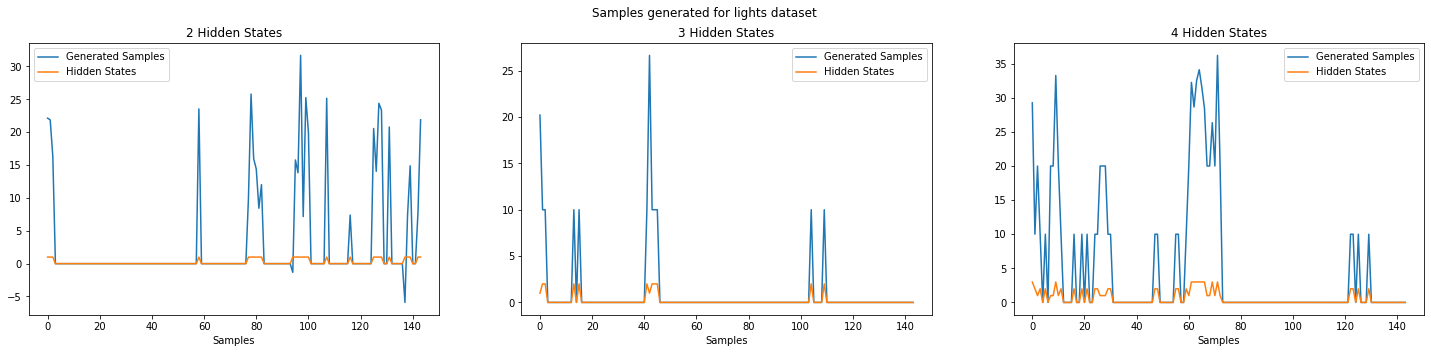

In [84]:
appliances_generated = compute_sampling(a_models, "Appliances")
lights_generated = compute_sampling(l_models, "lights")

## COMPARE GENERATED SEQUENCE WITH GROUND TRUTH DATA

In order to make the comparison between the true data and the data generated from the model we can compare their probability distributions. More they are similar, better the model succeeds to approximate the data.

In [85]:
#Compare the different density functions of the generated samples and the ground truth data.
def plot_densities(ground_truth_dataset, sample_dataset, column):
  plt.figure()

  ground_truth_dataset[column].plot(kind='kde', label='Ground Truth')
  
  #density list for each model
  sample_density_list = []
  for i, col in enumerate(sample_dataset.columns):
    sample_dataset[col].plot(kind='kde', label=f'{i+2} Hidden States')
  
  plt.title(f'Probability distributions of generated samples and real data ({column})')
  plt.legend()


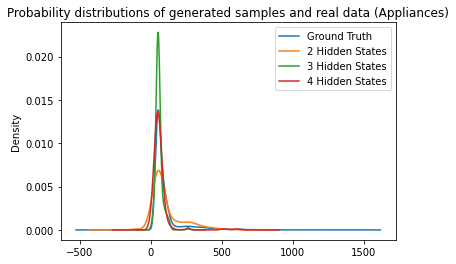

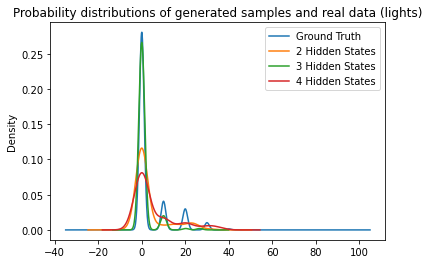

In [86]:
plot_densities(appliances_dataset, appliances_generated, "Appliances")
plot_densities(lights_dataset, lights_generated, "lights")

To measure the similarity between two densities we use the Kullback-Leibler divergence. It can assume values between 0 and +infinity, if the KL divergence between two distributions is zero, then it indicates that the distributions are identical. Lower the value of the KL divergence, the more similar the two distributions are.

In [87]:
import cv2 as cv

def compute_similarities(ground_truth_dataset, sample_dataset, column):
  
  ground_truth_hist, _ = np.histogram(ground_truth_dataset[column], bins=100, density=True)
  ground_truth_hist = np.array(ground_truth_hist, dtype="float32")

  i=2
  for col in sample_dataset.columns:
    sample_hist, _ = np.histogram(sample_dataset[col], bins=100, density=True)
    sample_hist = np.array(sample_hist, dtype="float32")

    kl_div = cv.compareHist(ground_truth_hist, sample_hist, cv.HISTCMP_KL_DIV)

    print(f'Model with {i} hidden states KL(Ground Truth || Sample) = {kl_div}')

    i+=1

    

KL Divergence for Appliances

In [88]:
compute_similarities(appliances_dataset,appliances_generated, "Appliances")

Model with 2 hidden states KL(Ground Truth || Sample) = 1.5156755536959778
Model with 3 hidden states KL(Ground Truth || Sample) = 0.1327322506899073
Model with 4 hidden states KL(Ground Truth || Sample) = 0.09316370350272814


KL Divergence for Lights

In [89]:
compute_similarities(lights_dataset,lights_generated, "lights")

Model with 2 hidden states KL(Ground Truth || Sample) = 10.400986095638888
Model with 3 hidden states KL(Ground Truth || Sample) = 5.506519917552791
Model with 4 hidden states KL(Ground Truth || Sample) = 6.129875927418306


## CONCLUSIONS

Hidden markov models have been shown to generate sequences similar to the original data. The use of multiple hidden states results in a better approximation of the data. Data generated multiple times may have slightly different densities and lead to slightly different KL divergence values.